In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')




✅ Data loaded successfully!


,user id,product id,Interaction type,Time stamp,Unnamed: 4,Customer ID,Age,Gender,Item Purchased,Category_x,Purchase Amount (USD),Location,Size,Color_x,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Uniqe Id,Product Name,Brand Name,Asin,Category_y,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,About Product,Product Specification,Technical Details,Shipping Weight,Product Dimensions,Image,Variants,Sku,Product Url,Stock,Product Details,Dimensions,Color_y,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14.0,Venmo,Fortnightly,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,NaN,10.7 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN,2.0,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2.0,Cash,Fortnightly,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,The snap circuits mini kits classpack provides...,4 pounds,14.7 x 11.1 x 10.2 inches 4.06 pounds,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN,3.0,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,show up to 2 reviews by default No longer are ...,12.8 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN,4.0,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49.0,PayPal,Weekly,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,Go to your orders and start the return Select ...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN,5.0,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31.0,PayPal,Annually,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,show up to 2 reviews by default 100% Officiall...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [2]:
# Set display settings
pd.set_option('display.max_columns', None)

# Load merged dataset
merged_df = pd.read_csv("merged_ecommerce_data.csv")

print("✅ Data loaded successfully!")
merged_df.head()

✅ Data loaded successfully!


,user id,product id,Interaction type,Time stamp,Unnamed: 4,Customer ID,Age,Gender,Item Purchased,Category_x,Purchase Amount (USD),Location,Size,Color_x,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,Uniqe Id,Product Name,Brand Name,Asin,Category_y,Upc Ean Code,List Price,Selling Price,Quantity,Model Number,About Product,Product Specification,Technical Details,Shipping Weight,Product Dimensions,Image,Variants,Sku,Product Url,Stock,Product Details,Dimensions,Color_y,Ingredients,Direction To Use,Is Amazon Seller,Size Quantity Variant,Product Description
0,1.0,4c69b61db1fc16e7013b43fc926e502d,purchase,10/10/2023 8:00,NaN,1.0,55.0,Male,Blouse,Clothing,53.0,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14.0,Venmo,Fortnightly,4c69b61db1fc16e7013b43fc926e502d,"DB Longboards CoreFlex Crossbow 41"" Bamboo Fib...",NaN,NaN,Sports & Outdoors | Outdoor Recreation | Skate...,NaN,NaN,$237.68,NaN,NaN,Make sure this fits by entering your model num...,Shipping Weight: 10.7 pounds (View shipping ra...,NaN,10.7 pounds,NaN,https://images-na.ssl-images-amazon.com/images...,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,https://www.amazon.com/DB-Longboards-CoreFlex-...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
1,2.0,66d49bbed043f5be260fa9f7fbff5957,view,11/10/2023 8:00,NaN,2.0,19.0,Male,Sweater,Clothing,64.0,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2.0,Cash,Fortnightly,66d49bbed043f5be260fa9f7fbff5957,"Electronic Snap Circuits Mini Kits Classpack, ...",NaN,NaN,Toys & Games | Learning & Education | Science ...,NaN,NaN,$99.95,NaN,55324,Make sure this fits by entering your model num...,Product Dimensions: 14.7 x 11.1 x 10.2...,The snap circuits mini kits classpack provides...,4 pounds,14.7 x 11.1 x 10.2 inches 4.06 pounds,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,https://www.amazon.com/Electronic-Circuits-Cla...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
2,3.0,2c55cae269aebf53838484b0d7dd931a,like,12/10/2023 8:00,NaN,3.0,50.0,Male,Jeans,Clothing,73.0,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23.0,Credit Card,Weekly,2c55cae269aebf53838484b0d7dd931a,3Doodler Create Flexy 3D Printing Filament Ref...,NaN,NaN,Toys & Games | Arts & Crafts | Craft Kits,NaN,NaN,$34.99,NaN,NaN,Make sure this fits by entering your model num...,ProductDimensions:10.3x3.4x0.8inches|ItemWeigh...,show up to 2 reviews by default No longer are ...,12.8 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,https://www.amazon.com/3Doodler-Plastic-Innova...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
3,4.0,18018b6bc416dab347b1b7db79994afa,view,13/10/2023 8:00,NaN,4.0,21.0,Male,Sandals,Footwear,90.0,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49.0,PayPal,Weekly,18018b6bc416dab347b1b7db79994afa,Guillow Airplane Design Studio with Travel Cas...,NaN,NaN,Toys & Games | Hobbies | Models & Model Kits |...,NaN,NaN,$28.91,NaN,142,Make 8 different Planes at one time. | Experim...,ProductDimensions:3.5x6.2x13inches|ItemWeight:...,Go to your orders and start the return Select ...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,https://www.amazon.com/Guillow-Airplane-Design...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN
4,5.0,e04b990e95bf73bbe6a3fa09785d7cd0,like,14/10/2023 8:00,NaN,5.0,45.0,Male,Blouse,Clothing,49.0,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31.0,PayPal,Annually,e04b990e95bf73bbe6a3fa09785d7cd0,Woodstock- Collage 500 pc Puzzle,NaN,NaN,Toys & Games | Puzzles | Jigsaw Puzzles,NaN,NaN,$17.49,NaN,62151,Make sure this fits by entering your model num...,ProductDimensions:1.9x8x10inches|ItemWeight:13...,show up to 2 reviews by default 100% Officiall...,13.4 ounces,NaN,https://images-na.ssl-images-amazon.com/images...,NaN,NaN,https://www.amazon.com/Woodstock-Collage-500-p...,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN


In [3]:
# Basic info
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user id                 2999 non-null   float64
 1   product id              2999 non-null   object 
 2   Interaction type        2871 non-null   object 
 3   Time stamp              2999 non-null   object 
 4   Unnamed: 4              0 non-null      float64
 5   Customer ID             2999 non-null   float64
 6   Age                     2999 non-null   float64
 7   Gender                  2999 non-null   object 
 8   Item Purchased          2999 non-null   object 
 9   Category_x              2999 non-null   object 
 10  Purchase Amount (USD)   2999 non-null   float64
 11  Location                2999 non-null   object 
 12  Size                    2999 non-null   object 
 13  Color_x                 2999 non-null   object 
 14  Season                  2999 non-null   

In [4]:
# Missing values
merged_df.isna().sum().sort_values(ascending=False).head(15)

Unnamed: 4               3294
Asin                     3294
Brand Name               3294
Product Description      3294
Sku                      3294
Size Quantity Variant    3294
Stock                    3294
Ingredients              3294
Color_y                  3294
Dimensions               3294
Product Details          3294
List Price               3294
Quantity                 3294
Direction To Use         3294
Upc Ean Code             3287
dtype: int64

## Drop Completely Empty & Unnecessary Columns

These columns have 0 non-null values and should be removed

In [5]:
# Drop columns with all missing values
merged_df = merged_df.dropna(axis=1, how='all')

# Drop unnecessary auto-generated columns
merged_df = merged_df.loc[:, ~merged_df.columns.str.contains('unnamed', case=False)]


## Handle Missing Values Properly

Split by numeric vs categorical:

In [8]:
# Separate numeric and categorical columns
num_cols = merged_df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = merged_df.select_dtypes(include=['object']).columns



In [9]:

# Fill numeric missing values with median
merged_df[num_cols] = merged_df[num_cols].fillna(merged_df[num_cols].median())


In [11]:
 # Fill categorical missing values with mode
merged_df[cat_cols] = merged_df[cat_cols].fillna(
    merged_df[cat_cols].mode().iloc[0]
)

In [12]:
# Verify no missing values remain
merged_df.isna().sum().sum()


np.int64(0)

## Final Data Validation

In [13]:
# Final check
print(merged_df.info())
merged_df.isna().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user id                 3294 non-null   float64
 1   product id              3294 non-null   object 
 2   Interaction type        3294 non-null   object 
 3   Time stamp              3294 non-null   object 
 4   Customer ID             3294 non-null   float64
 5   Age                     3294 non-null   float64
 6   Gender                  3294 non-null   object 
 7   Item Purchased          3294 non-null   object 
 8   Category_x              3294 non-null   object 
 9   Purchase Amount (USD)   3294 non-null   float64
 10  Location                3294 non-null   object 
 11  Size                    3294 non-null   object 
 12  Color_x                 3294 non-null   object 
 13  Season                  3294 non-null   object 
 14  Review Rating           3294 non-null   

user id                  0
product id               0
Interaction type         0
Time stamp               0
Customer ID              0
Age                      0
Gender                   0
Item Purchased           0
Category_x               0
Purchase Amount (USD)    0
dtype: int64

In [14]:
# Descriptive Statistics

merged_df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user id,3294.0,NaN,NaN,NaN,1500.0,826.186675,1.0,824.25,1500.0,2175.75,2999.0
product id,3294,2999,0000fe97fd6c7705b08b7f4c7c5312ce,296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Interaction type,3294,3,like,1568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time stamp,3294,366,10/10/2023 8:00,316,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,3294.0,NaN,NaN,NaN,1500.0,826.186675,1.0,824.25,1500.0,2175.75,2999.0
Age,3294.0,NaN,NaN,NaN,44.058288,14.584235,18.0,32.0,44.0,56.0,70.0
Gender,3294,2,Male,2947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item Purchased,3294,25,Jewelry,429,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category_x,3294,4,Clothing,1634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Purchase Amount (USD),3294.0,NaN,NaN,NaN,59.684274,22.709387,20.0,40.0,60.0,79.0,100.0


## 📊 Exploratory Data Analysis (EDA)

In [15]:
# Interaction type distribution
fig = px.histogram(merged_df, x='Interaction type', title='Interaction Types Distribution', color='Interaction type')
fig.show()

In [16]:
# Gender distribution
fig = px.pie(merged_df, names='Gender', title='Customer Gender Distribution')
fig.show()

In [17]:
# Age vs Purchases
merged_df['is_purchase'] = merged_df['Interaction type'].apply(lambda x: 1 if x == 'purchase' else 0)
fig = px.box(merged_df, x='Gender', y='Age', color='is_purchase', title='Age vs Purchase Behavior by Gender')
fig.show()

In [18]:
# Payment method preference
fig = px.histogram(merged_df, x='Payment Method', color='Gender', title='Preferred Payment Method by Gender', barmode='group')
fig.show()

## 🤖 Predictive Modeling

In [19]:
features = ['Age', 'Gender', 'Payment Method', 'Frequency of Purchases']
df_model = merged_df[features + ['is_purchase']].copy()
encoder = LabelEncoder()
for col in ['Gender', 'Payment Method', 'Frequency of Purchases']:
    df_model[col] = encoder.fit_transform(df_model[col].astype(str))

X = df_model.drop('is_purchase', axis=1)
y = df_model['is_purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.65402124430956

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.81      0.77       482
           1       0.30      0.22      0.25       177

    accuracy                           0.65       659
   macro avg       0.52      0.52      0.51       659
weighted avg       0.62      0.65      0.64       659



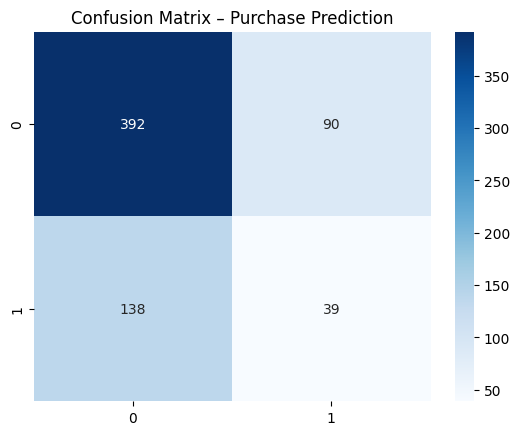

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:\n', classification_report(y_test, y_pred))


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix – Purchase Prediction')
plt.show()

## 🎯 Feature Importance

In [21]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
fig = px.bar(x=feat_importances.index, y=feat_importances.values, title='Feature Importance – What Drives Purchases?')
fig.update_xaxes(title='Features')
fig.update_yaxes(title='Importance')
fig.show()

## 🔍 Correlation Heatmap

In [22]:
corr = df_model.corr()
fig = px.imshow(corr, text_auto=True, title='Correlation Heatmap – Customer Behavior')
fig.show()

In [23]:
# Check what the dataset's column names look like
print("🧾 Columns in merged_df:")
print(list(merged_df.columns))

🧾 Columns in merged_df:
['user id', 'product id', 'Interaction type', 'Time stamp', 'Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category_x', 'Purchase Amount (USD)', 'Location', 'Size', 'Color_x', 'Season', 'Review Rating', 'Subscription Status', 'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Previous Purchases', 'Payment Method', 'Frequency of Purchases', 'Uniqe Id', 'Product Name', 'Category_y', 'Upc Ean Code', 'Selling Price', 'Model Number', 'About Product', 'Product Specification', 'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image', 'Variants', 'Product Url', 'Is Amazon Seller', 'is_purchase']


## 📦 Product Insights

In [24]:
# ✅ Normalize column names
merged_df.columns = merged_df.columns.str.strip().str.lower().str.replace(' ', '_')


In [25]:
# ✅ Rename columns based on your dataset
rename_map = {
    'category_x': 'category',
    'purchase_amount_(usd)': 'purchase_value',
}
merged_df.rename(columns=rename_map, inplace=True)

In [26]:
# --- 1️⃣ Category Conversion Rate (Purchases / Views) ---
if 'interaction_type' in merged_df.columns and 'category' in merged_df.columns:
    views = merged_df[merged_df['interaction_type'].str.lower() == 'view'].groupby('category').size()
    purchases = merged_df[merged_df['interaction_type'].str.lower() == 'purchase'].groupby('category').size()
    
    conversion_rate = (purchases / views.replace(0, np.nan)).dropna().reset_index()
    conversion_rate.columns = ['Category', 'Conversion Rate']
    
    fig = px.bar(
        conversion_rate.sort_values('Conversion Rate', ascending=False).head(10),
        x='Category',
        y='Conversion Rate',
        title='Top 10 Categories by Conversion Rate (Purchases / Views)',
        color='Conversion Rate',
        color_continuous_scale='Blues'
    )
    fig.update_layout(title_x=0.5, template='plotly_white')
    fig.show()
else:
    print("⚠️ Missing columns 'interaction_type' or 'category' for conversion rate analysis.")

In [27]:
# --- 2️⃣ Average Order Value (AOV) by Payment Method ---
if 'payment_method' in merged_df.columns and 'purchase_value' in merged_df.columns:
    aov = (
        merged_df[merged_df['interaction_type'].str.lower() == 'purchase']
        .groupby('payment_method')['purchase_value']
        .mean()
        .reset_index()
        .sort_values('purchase_value', ascending=False)
    )
    
    fig = px.bar(
        aov,
        x='payment_method',
        y='purchase_value',
        color='purchase_value',
        title='Average Order Value (AOV) by Payment Method',
        color_continuous_scale='Viridis'
    )
    fig.update_layout(
        title_x=0.5,
        template='plotly_white',
        xaxis_title='Payment Method',
        yaxis_title='Average Order Value (USD)'
    )
    fig.show()
else:
    print("⚠️ Missing 'payment_method' or 'purchase_value' column for AOV analysis.")

In [28]:

# --- 3️⃣ Monthly Purchases by Top Categories ---
if 'interaction_type' in merged_df.columns and 'category' in merged_df.columns and 'time_stamp' in merged_df.columns:
    merged_df['time_stamp'] = pd.to_datetime(merged_df['time_stamp'], errors='coerce')
    merged_df['month'] = merged_df['time_stamp'].dt.to_period('M').astype(str)
    
    purchases = merged_df[merged_df['interaction_type'].str.lower() == 'purchase']
    top_categories = purchases['category'].value_counts().head(5).index.tolist()
    
    trend = (
        purchases[purchases['category'].isin(top_categories)]
        .groupby(['month', 'category'])
        .size()
        .reset_index(name='Purchases')
    )
    
    fig = px.line(
        trend,
        x='month',
        y='Purchases',
        color='category',
        markers=True,
        title='Monthly Purchase Trend for Top 5 Categories'
    )
    fig.update_layout(
        title_x=0.5,
        template='plotly_white',
        xaxis_title='Month',
        yaxis_title='Number of Purchases'
    )
    fig.show()
else:
    print("⚠️ Missing 'interaction_type', 'category', or 'time_stamp' for monthly trend analysis.")
